In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
from mpl_toolkits import mplot3d
from array import *
from scipy.integrate import *
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy.random import normal
from numpy import hstack

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter, MultipleLocator

!pip install pymannkendall
import pymannkendall as mk

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
# plt.rcParams['figure.figsize'] = [10.24, 7.6]
# plt.rcParams['figure.dpi'] = 300

In [2]:
naon = pd.read_csv("naon.csv")
naop = pd.read_csv("naop.csv")

In [3]:
naon


,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
0,0,5,6,01-06-1965,1965,1,6,1.610,6.53,60.30,...,196501,0.771707,0.933508,0.598240,0.679268,196501,-0.95,1.750,15.40,1.705215
1,1,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,...,196502,0.589570,0.896086,0.039844,0.661609,196502,-0.61,1.690,23.10,1.485656
2,2,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,...,196502,0.589570,0.896086,0.039844,0.661609,196502,-0.61,1.680,23.10,1.485656
3,5,369,370,01-05-1966,1966,1,5,1.680,7.09,19.30,...,196601,0.786625,0.961431,0.198075,0.938034,196601,-0.67,1.680,25.00,1.748056
4,6,374,375,01-10-1966,1966,1,10,1.970,13.40,17.20,...,196601,0.877980,0.997641,0.166964,0.987250,196601,-0.67,1.690,66.40,1.875622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,778,15630,15631,10/31/2011,2011,10,31,1.715,22.70,60.20,...,201110,0.942751,0.970419,0.597412,0.979026,201110,-1.92,1.715,33.70,1.913171
435,779,15649,15650,11/25/2011,2011,11,25,1.598,0.35,55.20,...,201111,0.424646,0.922734,0.565090,0.631837,201111,-2.95,1.682,50.10,1.347380
436,780,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.70,...,201111,0.660143,0.958753,0.492477,0.838391,201111,-2.95,1.670,6.26,1.618896
437,781,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.70,...,201111,0.660143,0.958753,0.492477,0.838391,201111,-2.95,1.676,6.26,1.618896


In [4]:
naop

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
0,3,346,347,12/13/1965,1965,12,13,1.540,2.76,32.3,...,196512,0.646436,0.887926,0.364656,0.829275,196512,0.25,1.670,11.90,1.534362
1,4,360,361,12/27/1965,1965,12,27,1.660,2.41,17.4,...,196512,0.632475,0.954737,0.170215,0.881295,196512,0.25,1.660,5.19,1.587212
2,30,1421,1422,11/22/1968,1968,11,22,1.790,0.52,23.7,...,196811,0.458116,0.986102,0.260997,0.832590,196811,0.03,1.890,6.23,1.444218
3,31,1423,1424,11/24/1968,1968,11,24,1.540,0.00,23.4,...,196811,0.236580,0.887926,0.257044,0.427069,196811,0.03,1.790,20.20,1.124506
4,32,1423,1424,11/24/1968,1968,11,24,1.540,0.00,23.4,...,196811,0.236580,0.887926,0.257044,0.427069,196811,0.03,1.690,20.20,1.124506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,715,15008,15009,02-06-2010,2010,2,6,1.769,15.10,9.5,...,201002,0.895002,0.981767,0.041247,0.997195,201002,0.25,1.749,42.70,1.876769
329,716,15008,15009,02-06-2010,2010,2,6,1.769,15.10,9.5,...,201002,0.895002,0.981767,0.041247,0.997195,201002,0.25,1.769,42.70,1.876769
330,717,15015,15016,2/13/2010,2010,2,13,1.824,5.91,9.0,...,201002,0.757873,0.989290,0.034234,0.990437,201002,0.25,1.994,16.60,1.747163
331,718,15015,15016,2/13/2010,2010,2,13,1.824,5.91,9.0,...,201002,0.757873,0.989290,0.034234,0.990437,201002,0.25,1.824,16.60,1.747163


In [5]:
# naon.groupby(naon.yymo).(['emp_pcp', 'emp_twl', 'emp_sflow', 'emp_skewv']).mean()
naon_avg=naon.groupby(naon.yymo).mean()
naon_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
yymo,,,,,,,,,,,,,,,,,,,
196501,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,60.300000,0.109000,0.771707,0.933508,0.598240,0.679268,196501.0,-0.95,1.7500,15.400000,1.705215
196502,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,9.430000,0.102000,0.589570,0.896086,0.039844,0.661609,196502.0,-0.61,1.6850,23.100000,1.485656
196601,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,17.900000,0.391333,0.847529,0.985571,0.177334,0.970844,196601.0,-0.67,1.7800,52.600000,1.833100
196602,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,23.425000,0.242500,0.655824,0.959805,0.251195,0.871797,196602.0,-0.43,1.7900,10.015000,1.615629
196612,12.0,714.000000,715.000000,1966.0,12.0,16.000000,1.510000,1.730000,30.600000,0.187000,0.589570,0.861724,0.347061,0.827744,196612.0,-0.21,1.6600,43.800000,1.451294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201104,771.5,15423.000000,15424.000000,2011.0,4.0,3.000000,1.669000,4.450000,24.700000,0.532000,0.717009,0.955948,0.273811,0.995665,201104.0,-1.02,1.6995,24.900000,1.672957
201109,773.0,15582.000000,15583.000000,2011.0,9.0,11.000000,1.315000,0.000000,88.400000,0.039000,0.236580,0.572166,0.724085,0.487377,201109.0,-2.50,1.7300,0.300000,0.808747
201110,776.0,15628.000000,15629.000000,2011.0,10.0,29.000000,1.814800,10.400000,80.740000,0.345200,0.739844,0.982889,0.683476,0.938812,201110.0,-1.92,1.8164,40.820000,1.722734


In [6]:
naop_avg=naop.groupby(naop.yymo).mean()
naop_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
yymo,,,,,,,,,,,,,,,,,,,
196512,3.5,353.000000,354.000000,1965.0,12.0,20.000000,1.600000,2.585000,24.850000,0.208500,0.639456,0.921331,0.267436,0.855285,196512.0,0.25,1.665000,8.545000,1.560787
196811,31.0,1422.333333,1423.333333,1968.0,11.0,23.333333,1.623333,0.173333,23.500000,0.074667,0.310425,0.920651,0.258362,0.562242,196811.0,0.03,1.790000,15.543333,1.231077
196910,38.0,1748.000000,1749.000000,1969.0,10.0,15.000000,1.530000,0.720000,43.000000,0.059000,0.492159,0.878809,0.470674,0.543032,196910.0,0.95,1.700000,5.840000,1.370968
197001,40.5,1841.500000,1842.500000,1970.0,1.0,16.500000,1.720000,2.830000,34.925000,0.221500,0.505323,0.970180,0.389073,0.825625,197001.0,1.06,1.757500,22.700000,1.475504
197003,43.0,1893.000000,1894.000000,1970.0,3.0,9.000000,1.580000,4.880000,22.300000,0.155000,0.730397,0.915211,0.241107,0.774576,197003.0,1.20,1.660000,8.620000,1.645608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200601,645.0,13934.333333,13935.333333,2006.0,1.0,8.333333,1.730667,0.140000,74.233333,0.292667,0.281206,0.974691,0.669599,0.884015,200601.0,0.54,1.706667,8.110000,1.255897
200602,647.0,13959.000000,13960.000000,2006.0,2.0,2.000000,1.658000,19.300000,25.700000,0.263000,0.924519,0.951422,0.286115,0.916741,200602.0,0.38,1.658000,66.400000,1.875940
200909,682.0,14870.000000,14871.000000,2009.0,9.0,19.000000,1.658000,3.400000,56.300000,0.326000,0.679204,0.951422,0.571656,0.957542,200909.0,0.33,1.658000,31.700000,1.630626


In [7]:
naon_avg['nint_twl_pcp']=   naon_avg['emp_pcp'] + naon_avg['emp_twl']          # 1) TWL and pcp
naon_avg['nint_twl_sflow']= naon_avg['emp_twl'] + naon_avg['emp_sflow']          # 2) TWL and streamflow 
naon_avg['nint_sflow_ssurge']=naon_avg['emp_sflow'] + naon_avg['emp_skewv']         # 3) sflow and skewsurge
naon_avg['nint_pcp_ssurg']= naon_avg['emp_pcp'] + naon_avg['emp_skewv']         #4) pcp and skewsurge

In [8]:
naop_avg['pint_twl_pcp']=   naop_avg['emp_pcp'] + naop_avg['emp_twl']           # 1) TWL and pcp
naop_avg['pint_twl_sflow']= naop_avg['emp_twl'] + naop_avg['emp_sflow']          # 2) TWL and streamflow 
naop_avg['pint_sflow_ssurge']=naop_avg['emp_sflow'] + naop_avg['emp_skewv']             # 3) TWL and skewsurge
naop_avg['pint_pcp_ssurg']= naop_avg['emp_pcp'] + naop_avg['emp_skewv']            #4) pcp and skewsurge

In [9]:
naon_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
196501,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,60.300000,0.109000,...,0.679268,196501.0,-0.95,1.7500,15.400000,1.705215,1.705215,1.531748,1.277509,1.450975
196502,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,9.430000,0.102000,...,0.661609,196502.0,-0.61,1.6850,23.100000,1.485656,1.485656,0.935930,0.701454,1.251179
196601,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,17.900000,0.391333,...,0.970844,196601.0,-0.67,1.7800,52.600000,1.833100,1.833100,1.162905,1.148179,1.818373
196602,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,23.425000,0.242500,...,0.871797,196602.0,-0.43,1.7900,10.015000,1.615629,1.615629,1.211000,1.122992,1.527620
196612,12.0,714.000000,715.000000,1966.0,12.0,16.000000,1.510000,1.730000,30.600000,0.187000,...,0.827744,196612.0,-0.21,1.6600,43.800000,1.451294,1.451294,1.208785,1.174806,1.417315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201104,771.5,15423.000000,15424.000000,2011.0,4.0,3.000000,1.669000,4.450000,24.700000,0.532000,...,0.995665,201104.0,-1.02,1.6995,24.900000,1.672957,1.672957,1.229759,1.269476,1.712674
201109,773.0,15582.000000,15583.000000,2011.0,9.0,11.000000,1.315000,0.000000,88.400000,0.039000,...,0.487377,201109.0,-2.50,1.7300,0.300000,0.808747,0.808747,1.296251,1.211462,0.723958
201110,776.0,15628.000000,15629.000000,2011.0,10.0,29.000000,1.814800,10.400000,80.740000,0.345200,...,0.938812,201110.0,-1.92,1.8164,40.820000,1.722734,1.722734,1.666365,1.622287,1.678656


In [10]:
naop_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
196512,3.5,353.000000,354.000000,1965.0,12.0,20.000000,1.600000,2.585000,24.850000,0.208500,...,0.855285,196512.0,0.25,1.665000,8.545000,1.560787,1.560787,1.188767,1.122721,1.494741
196811,31.0,1422.333333,1423.333333,1968.0,11.0,23.333333,1.623333,0.173333,23.500000,0.074667,...,0.562242,196811.0,0.03,1.790000,15.543333,1.231077,1.231077,1.179013,0.820604,0.872668
196910,38.0,1748.000000,1749.000000,1969.0,10.0,15.000000,1.530000,0.720000,43.000000,0.059000,...,0.543032,196910.0,0.95,1.700000,5.840000,1.370968,1.370968,1.349484,1.013706,1.035191
197001,40.5,1841.500000,1842.500000,1970.0,1.0,16.500000,1.720000,2.830000,34.925000,0.221500,...,0.825625,197001.0,1.06,1.757500,22.700000,1.475504,1.475504,1.359253,1.214698,1.330948
197003,43.0,1893.000000,1894.000000,1970.0,3.0,9.000000,1.580000,4.880000,22.300000,0.155000,...,0.774576,197003.0,1.20,1.660000,8.620000,1.645608,1.645608,1.156318,1.015683,1.504973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200601,645.0,13934.333333,13935.333333,2006.0,1.0,8.333333,1.730667,0.140000,74.233333,0.292667,...,0.884015,200601.0,0.54,1.706667,8.110000,1.255897,1.255897,1.644290,1.553615,1.165222
200602,647.0,13959.000000,13960.000000,2006.0,2.0,2.000000,1.658000,19.300000,25.700000,0.263000,...,0.916741,200602.0,0.38,1.658000,66.400000,1.875940,1.875940,1.237537,1.202856,1.841260
200909,682.0,14870.000000,14871.000000,2009.0,9.0,19.000000,1.658000,3.400000,56.300000,0.326000,...,0.957542,200909.0,0.33,1.658000,31.700000,1.630626,1.630626,1.523078,1.529198,1.636746


# 1) TWL and pcp (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.05726174604074852, z=-1.9013075094609717, Tau=-0.1077814404155429, s=-1079.0, var_s=321464.3333333333, slope=-0.0008373795180180179, intercept=1.578373094686937)


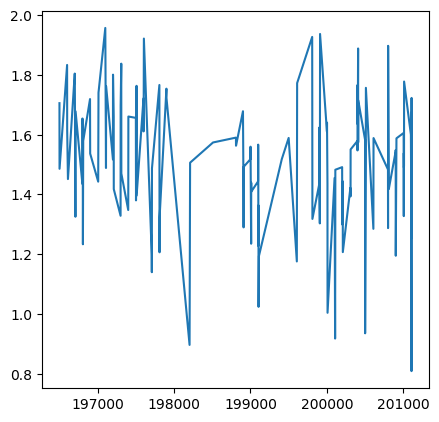

In [11]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_pcp)
result = mk.original_test(naon_avg.nint_twl_pcp)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg, nint_pcp_ssurg

# 2) TWL and streamflow (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.15929061454491622, z=1.4074614031074726, Tau=0.07981220657276995, s=799.0, var_s=321464.3333333333, slope=0.0008071502499999994, intercept=1.295193319375)


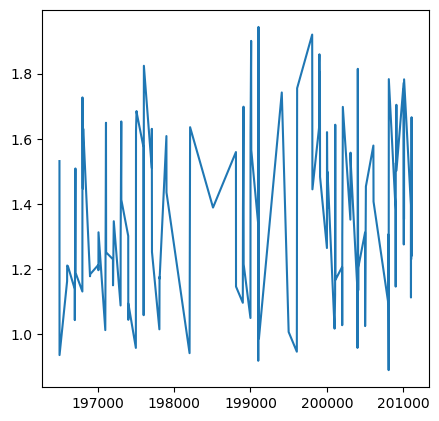

In [12]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_sflow)
result = mk.original_test(naon_avg.nint_twl_sflow)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='increasing', h=True, p=0.025094504140028784, z=2.2399448395319426, Tau=0.12696034362201578, s=1271.0, var_s=321464.3333333333, slope=0.001317811785326084, intercept=1.1860213376345112)


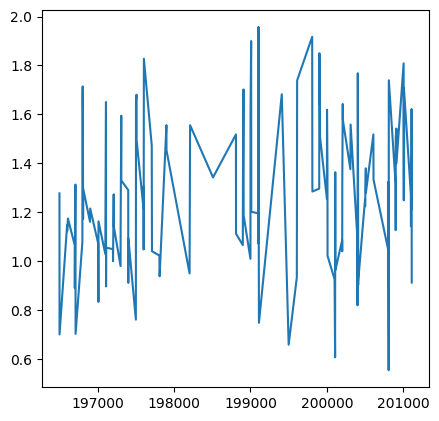

In [13]:
plt.plot(naon_avg.nao_yymmo, naon_avg.nint_sflow_ssurge)
result = mk.original_test(naon_avg.nint_sflow_ssurge)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.6239084430206816, z=-0.49031863416525984, Tau=-0.027869343721905904, s=-279.0, var_s=321464.3333333333, slope=-0.00023031887218042565, intercept=1.44945818673872)


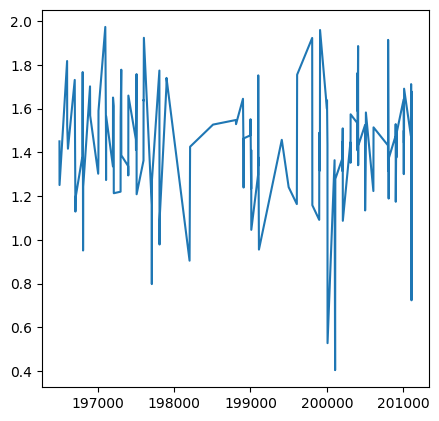

In [14]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_pcp_ssurg)
result = mk.original_test(naon_avg.nint_pcp_ssurg)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 1)TWL and pcp (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.900215452062372, z=0.12538918196718735, Tau=0.008958566629339306, s=40.0, var_s=96740.66666666667, slope=8.204491739130153e-05, intercept=1.4940146016826088)


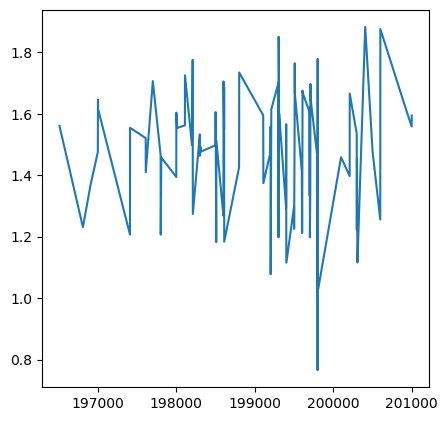

In [15]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_pcp)
result = mk.original_test(naop_avg.pint_twl_pcp)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 2)TWL and streamflow (intensity)- positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.451851907485034, z=0.7523312034215099, Tau=0.05263157894736842, s=235.0, var_s=96741.66666666667, slope=0.0007249412476190418, intercept=1.2839502023619052)


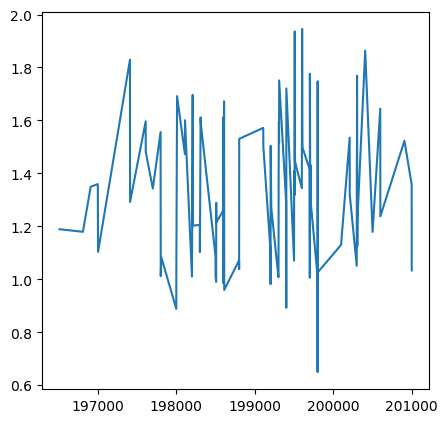

In [16]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_sflow)
result = mk.original_test(naop_avg.pint_twl_sflow)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='increasing', h=True, p=0.031994724623890525, z=2.1444765223618965, Tau=0.1496080627099664, s=668.0, var_s=96740.66666666667, slope=0.002470546442735039, intercept=1.0985821369414532)


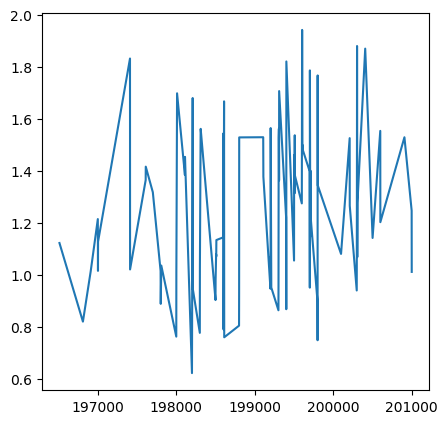

In [17]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_sflow_ssurge)
result = mk.original_test(naop_avg.pint_sflow_ssurge)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.059993996042720266, z=1.8808377295078103, Tau=0.13124300111982082, s=586.0, var_s=96740.66666666667, slope=0.0017191923754385993, intercept=1.329410887354386)


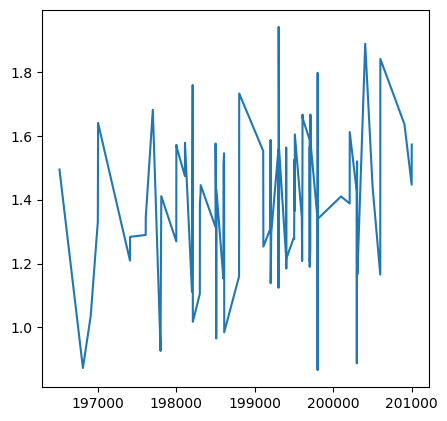

In [18]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_pcp_ssurg)
result = mk.original_test(naop_avg.pint_pcp_ssurg)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 1)TWL and pcp (intensity) - negative phase - correlation

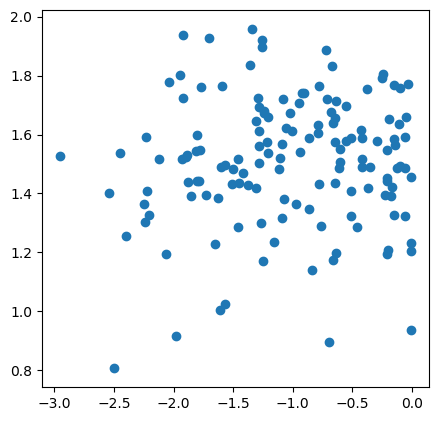

Kendall correlation coefficient: 0.030
Samples are uncorrelated (fail to reject H0) p=0.592


In [19]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_pcp)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2) TWL and streamflow (intensity) - neagtive phase - correlation

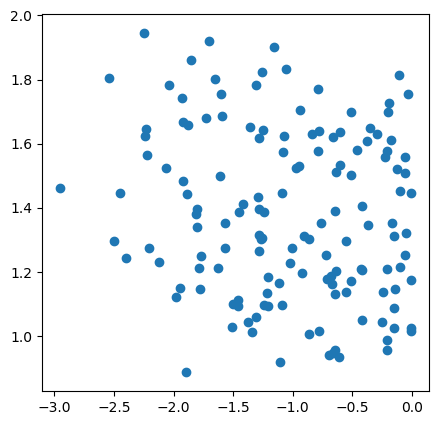

Kendall correlation coefficient: -0.105
Samples are uncorrelated (fail to reject H0) p=0.065


In [20]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_sflow)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - neagtive phase - correlation

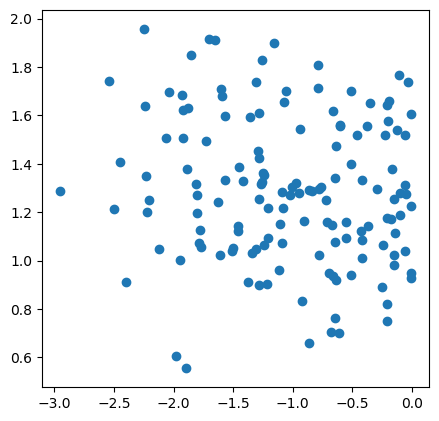

Kendall correlation coefficient: -0.086
Samples are uncorrelated (fail to reject H0) p=0.130


In [21]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - neagtive phase - correlation

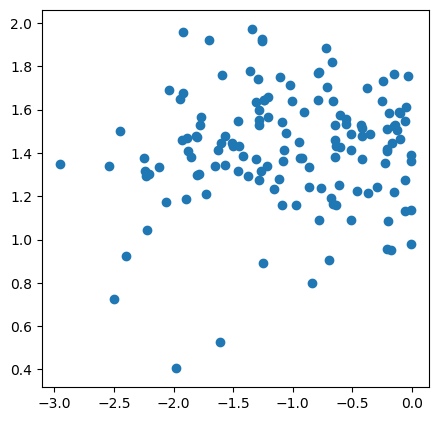

Kendall correlation coefficient: 0.028
Samples are uncorrelated (fail to reject H0) p=0.626


In [22]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 1)TWL and pcp (intensity) - positive phase- correlation

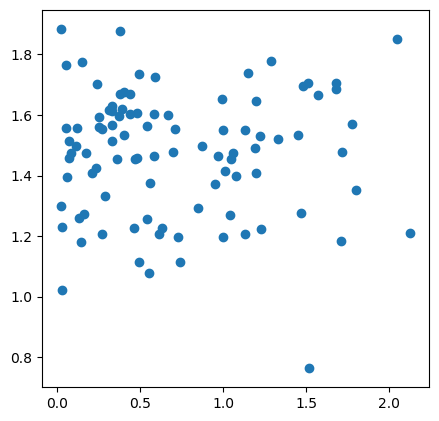

Kendall correlation coefficient: 0.004
Samples are uncorrelated (fail to reject H0) p=0.956


In [23]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_pcp)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2)TWL and streamflow (intensity)- positive phase- correlation

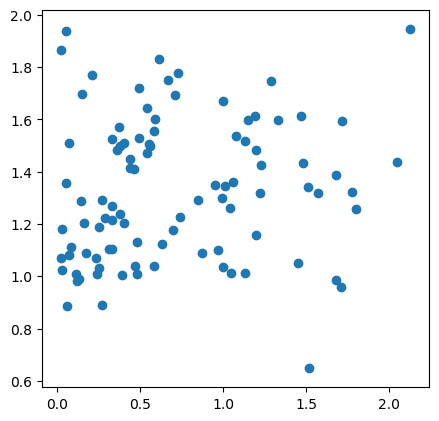

Kendall correlation coefficient: 0.142
Samples are correlated (reject H0) p=0.041


In [24]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_sflow)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - positive phase- correlation

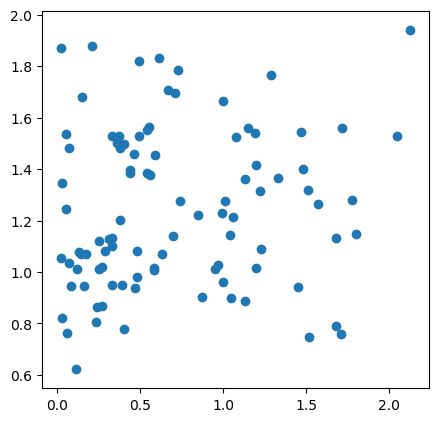

Kendall correlation coefficient: 0.115
Samples are uncorrelated (fail to reject H0) p=0.099


In [25]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - positive phase- correlation

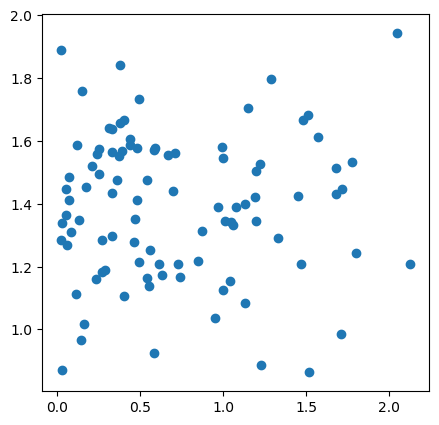

Kendall correlation coefficient: -0.006
Samples are uncorrelated (fail to reject H0) p=0.931


In [26]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [27]:
# naon_avg.to_csv('naon_avg.csv')
# naop_avg.to_csv('naop_avg.csv')